In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [84]:
df = pd.read_csv('data/Portuguese.csv')
print(df.head())
print('\n')
print(df.info())
print('\n')
print(df.isnull().sum())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (

In [9]:
#We must prepare the data first. K-means is not ideal for categorical data so we'll focus on the numerical.
X = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'health', 'Dalc', 'Walc', 'G1', 
        'G2', 'G3', 'goout', 'freetime', 'absences']]
#Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

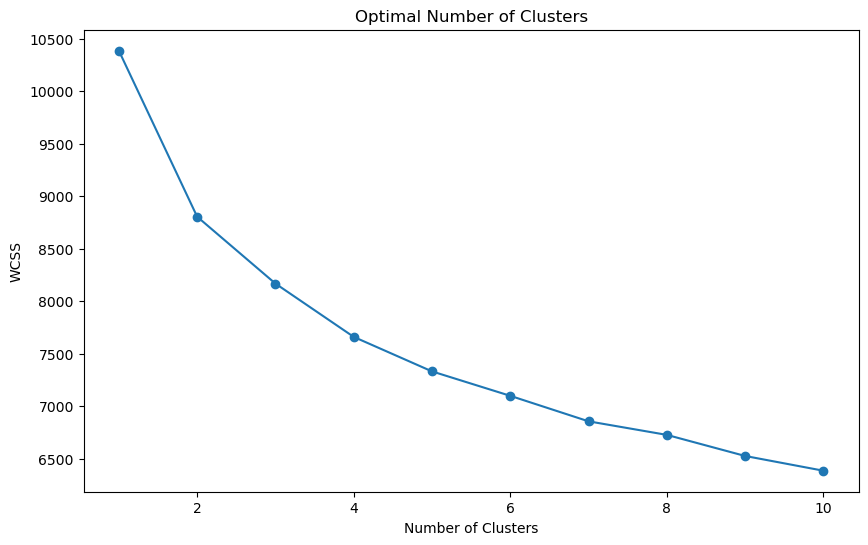

In [31]:
#Before we perform K-means, we must decide how many clusters we're going to use.
wcss = []
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
#Plotting elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [90]:
#From the elbow plot we can determine that the ideal no. of clusters is 2.
optimal_clusters = 2
#K-Means
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    kmeans.fit(X_scaled)
    df['Cluster'] = kmeans.labels_

In [109]:
#Displaying the dataset again with the cluster labels
print(df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'health', 'Dalc', 'Walc', 'G1', 
          'G2', 'G3', 'goout', 'freetime', 'absences', 'Cluster']].head())
print('\n')
#Analyzing the centroid values of each cluster
cluster_analysis = df.groupby('Cluster')[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
                                          'health', 'Dalc', 'Walc', 'G1', 'G2', 'G3', 'goout', 'freetime', 
                                          'absences']].mean()
print(cluster_analysis)

   age  Medu  Fedu  traveltime  studytime  failures  famrel  health  Dalc  \
0   18     4     4           2          2         0       4       3     1   
1   17     1     1           1          2         0       5       3     1   
2   15     1     1           1          2         0       4       3     2   
3   15     4     2           1          3         0       3       5     1   
4   16     3     3           1          2         0       4       5     1   

   Walc  G1  G2  G3  goout  freetime  absences  Cluster  
0     1   0  11  11      4         3         4        1  
1     1   9  11  11      3         3         2        1  
2     3  12  13  12      2         3         6        0  
3     1  14  14  14      2         2         0        0  
4     2  11  13  13      2         3         0        0  


               age      Medu      Fedu  traveltime  studytime  failures  \
Cluster                                                                   
0        16.502717  2.877717  2.61413

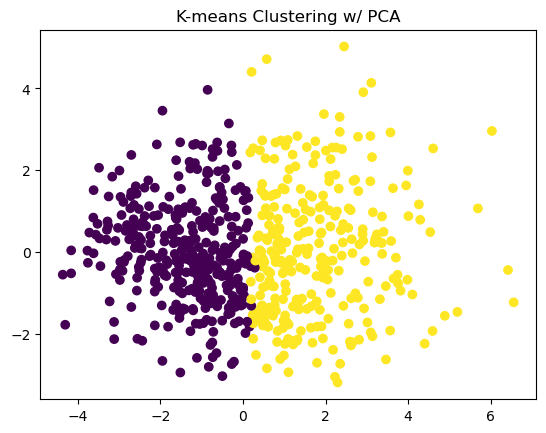

In [113]:
#Reducing the dimensionality to visualise it
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
#Plotting the PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering w/ PCA')
plt.show()